In [2]:
! pip install supervision
! pip install ultralytics

  Using cached supervision-0.25.1-py3-none-any.whl.metadata (14 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached supervision-0.25.1-py3-none-any.whl (181 kB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl (43.6 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\8th SEM\\Machine Vision\\Assignment\\Assignment_03\\YOLO11\\myenv\\Lib\\site-packages\\scipy\\sparse\\_sparsetools.cp312-win_amd64.pyd'
Check the permissions.



ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\8th SEM\\Machine Vision\\Assignment\\Assignment_03\\YOLO11\\myenv\\Lib\\site-packages\\sympy\\core\\alphabets.py'
Check the permissions.




  Using cached ultralytics-8.3.73-py3-none-any.whl.metadata (35 kB)
  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
  Usi

In [6]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import supervision as sv
import torch

In [7]:
img = cv2.imread("demo5_images/cars1.jpg")


image 1/1 d:\8th SEM\Machine Vision\Assignment\Assignment_03\YOLO11\myenv\demo5_images\cars1.jpg: 416x640 14 cars, 843.0ms
Speed: 2.0ms preprocess, 843.0ms inference, 284.1ms postprocess per image at shape (1, 3, 416, 640)


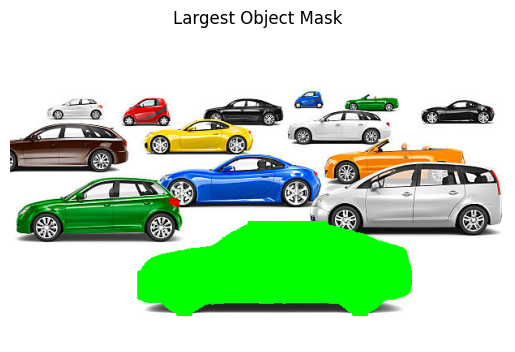

In [98]:
# Load the YOLO segmentation model
model = YOLO("yolo11n-seg.pt")  # Load your model

# Run inference on an image
image_path = "demo5_images/cars1.jpg"  # Replace with your image path
results = model(image_path)  # Perform segmentation

# Initialize variables to track the largest box
largest_area = 0
largest_box_index = -1

# Iterate through the boxes in the results object
for result in results:
    if result.masks:  # Check if masks exist
        for i, (mask, box) in enumerate(zip(result.masks.xy, result.boxes)):
            # Convert mask points to a contour format
            contour = np.array(mask, dtype=np.int32)
            area = cv2.contourArea(contour)  # Compute the area

            # Find out the index of the box with the largest area
            if area > largest_area:
                largest_area = area
                largest_box_index = i  # Store the index of the box with the largest area

# Draw the mask of the box with the largest area
if largest_box_index != -1:
    # Reload the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

    # Get the largest mask
    largest_mask = results[0].masks.xy[largest_box_index]

    # Convert to integer array
    largest_mask = np.array(largest_mask, dtype=np.int32)

    # Draw the mask on the image
    cv2.polylines(image, [largest_mask], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.fillPoly(image, [largest_mask], color=(0, 255, 0, 100))  # Fill mask with transparency

    # Display the image with the mask
    plt.imshow(image)
    plt.axis("off")
    plt.title("Largest Object Mask")
    plt.show()
else:
    print("No segmentation masks detected!")

100%|██████████| 6.74M/6.74M [01:21<00:00, 86.8kB/s]

image 1/1 d:\8th SEM\Machine Vision\Assignment\Assignment_03\YOLO11\myenv\demo5_images\cars1.jpg: 416x640 14 cars, 112.1ms
Speed: 3.0ms preprocess, 112.1ms inference, 13.0ms postprocess per image at shape (1, 3, 416, 640)


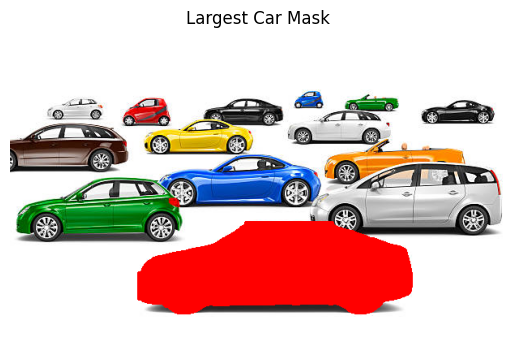

In [9]:
# Load YOLO segmentation model
model = YOLO("yolov8n-seg.pt")

# Run inference on an image
image_path = "demo5_images/cars1.jpg"
results = model(image_path)

# Convert results to Supervision format
supervision_detections = sv.Detections.from_ultralytics(results[0])

# Extract masks and class IDs
masks = supervision_detections.mask
class_ids = supervision_detections.class_id

# Load class names (COCO dataset)
class_names = model.names

# Identify the largest car mask
largest_area = 0
largest_mask = None

for mask, class_id in zip(masks, class_ids):
    if class_names[class_id] == "car":  # Filter only cars
        area = np.sum(mask)  # Count pixels in the mask (approximate area)
        if area > largest_area:
            largest_area = area
            largest_mask = mask

# Draw the largest mask on the image
if largest_mask is not None:
    # Load the original image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Convert mask to a format usable by OpenCV
    largest_mask = (largest_mask * 255).astype(np.uint8)  # Convert to binary mask
    contours, _ = cv2.findContours(largest_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the mask
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)  # Blue outline
    image[largest_mask > 0] = [255, 0, 0]  # Fill mask with color

    # Display the image
    plt.imshow(image)
    plt.axis("off")
    plt.title("Largest Car Mask")
    plt.show()
else:
    print("No car detected!")


image 1/1 d:\8th SEM\Machine Vision\Assignment\Assignment_03\YOLO11\myenv\demo5_images\cars1.jpg: 416x640 14 cars, 189.8ms
Speed: 2.0ms preprocess, 189.8ms inference, 10.5ms postprocess per image at shape (1, 3, 416, 640)


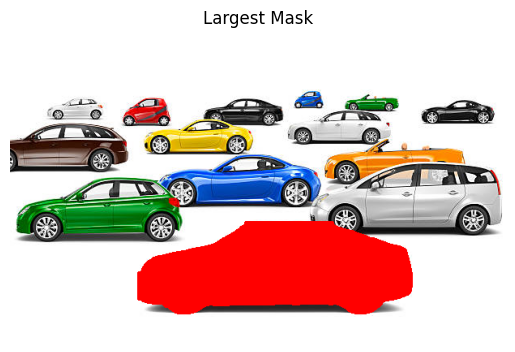

In [99]:
# Load YOLO segmentation model
model = YOLO("yolov8n-seg.pt")

# Run inference on an image
image_path = "demo5_images/cars1.jpg"
results = model(image_path)

# Convert results to Supervision format
supervision_detections = sv.Detections.from_ultralytics(results[0])

# Extract masks and class IDs
masks = supervision_detections.mask
class_ids = supervision_detections.class_id

# Load class names (COCO dataset)
class_names = model.names

# Identify the largest mask
largest_area = 0
largest_mask = None

for mask, class_id in zip(masks, class_ids):
    area = np.sum(mask)  # Calculate the area (number of pixels in the mask)
    if area > largest_area:
        largest_area = area
        largest_mask = mask

# Draw the largest mask on the image
if largest_mask is not None:
    # Load the original image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

    # Convert mask to a format usable by OpenCV
    largest_mask = (largest_mask * 255).astype(np.uint8)  # Convert to binary mask
    contours, _ = cv2.findContours(largest_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the mask
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)  # Blue outline
    image[largest_mask > 0] = [255, 0, 0]  # Fill mask with color

    # Display the image
    plt.imshow(image)
    plt.axis("off")
    plt.title("Largest Mask")
    plt.show()
else:
    print("No masks detected!")


0: 384x640 1 chair, 86.6ms
Speed: 3.0ms preprocess, 86.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


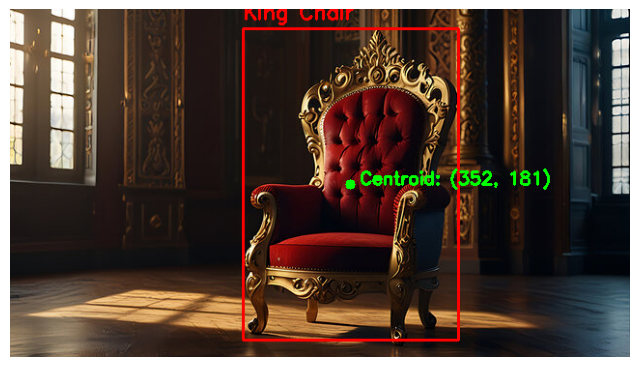

In [95]:
# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Load the image
image_path = "demo5_images/kingChair.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Run YOLOv8 inference
results = model(image)

# Loop through detections to calculate centroid for chairs and draw bounding box
for result in results:
    for box in result.boxes:
        class_id = int(box.cls[0])  # Get class ID
        if model.names[class_id] == "chair":  # Only detect chairs (including king chair if classified as "chair")
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates

            # Calculate the centroid of the bounding box
            centroid_x = (x1 + x2) / 2
            centroid_y = (y1 + y2) / 2

            # Draw the bounding box with thicker lines
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image_rgb, "King Chair", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

            # Draw the centroid of the chair (a green dot)
            cv2.circle(image_rgb, (int(centroid_x), int(centroid_y)), 5, (0, 255, 0), -1)  # Green dot for centroid
            cv2.putText(image_rgb, f"Centroid: ({int(centroid_x)}, {int(centroid_y)})", 
                        (int(centroid_x) + 10, int(centroid_y)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the output image with bounding box and centroid
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

In [41]:
! pip install transformers

  Using cached transformers-4.48.3-py3-none-any.whl.metadata (44 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.2-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
Using cached transformers-4.48.3-py3-none-any.whl (9.7 MB)
Using cached safetensors-0.5.2-cp38-abi3-win_amd64.whl (303 kB)
Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl (2.4 MB)


Device set to use cpu


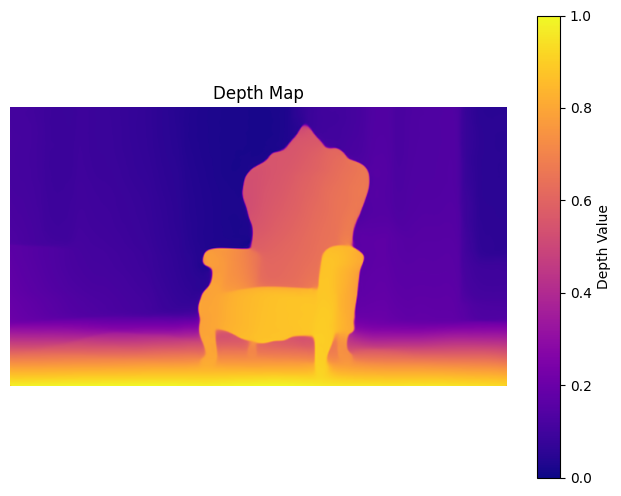

In [97]:
from transformers import pipeline

# Load Depth Anything V2 model for depth estimation
depth_pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-base-hf")

# Load the image
image_path = "demo5_images/kingChair.jpg"  # Change to your image path
image = Image.open(image_path).convert("RGB")  # Convert to RGB for depth estimation

# Run Depth Anything V2 inference to get the depth map
depth_result = depth_pipe(image)
depth_map = np.array(depth_result["depth"])

# Normalize depth for better visualization
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())  # Normalize to [0,1]

# Display the depth map
plt.figure(figsize=(8, 6))
plt.imshow(depth_map, cmap="plasma")  # 'plasma' colormap for better contrast
plt.axis("off")
plt.colorbar(label="Depth Value")  # Add colorbar for depth values
plt.title("Depth Map")
plt.show()

Device set to use cpu



0: 384x640 1 chair, 110.3ms
Speed: 29.5ms preprocess, 110.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Centroid of the chair: (352.0, 181.0)
Depth value at the centroid: 0.6039215686274509


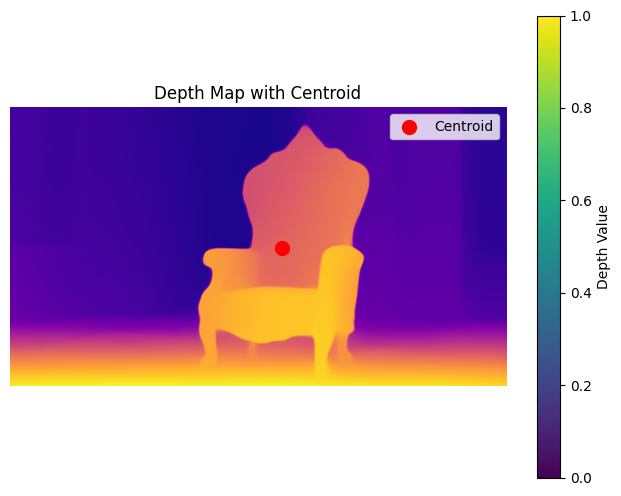

In [96]:
from transformers import pipeline

# Load the YOLOv8 model for chair detection
model = YOLO("yolov8n.pt")

# Load Depth Anything V2 model for depth estimation
depth_pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-base-hf")

# Load the image
image_path = "demo5_images/kingChair.jpg"  # Change to your image path
image = Image.open(image_path).convert("RGB")  # Convert to RGB for depth estimation

# Run YOLOv8 inference to detect chairs and calculate centroid of largest chair
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
results = model(image_rgb)  # Perform detection on the image

# Find the largest chair
largest_chair = None
max_area = 0

for box in results[0].boxes:
    class_id = int(box.cls[0])  # Get the class ID
    if model.names[class_id] == "chair":  # Only consider chair detections
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        area = (x2 - x1) * (y2 - y1)  # Area of the bounding box
        if area > max_area:
            max_area = area
            largest_chair = (x1, y1, x2, y2)

# If a largest chair is detected, calculate the centroid
if largest_chair:
    x1, y1, x2, y2 = largest_chair
    centroid_x = (x1 + x2) / 2
    centroid_y = (y1 + y2) / 2

    # Print the centroid coordinates
    print(f"Centroid of the chair: ({centroid_x}, {centroid_y})")

# Run Depth Anything V2 inference to get the depth map
depth_result = depth_pipe(image)
depth_map = np.array(depth_result["depth"])

# Normalize depth for better visualization
depth_map = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())  # Normalize to [0,1]

# Query the depth value at the centroid's location (make sure to convert to integer indices)
depth_value = depth_map[int(centroid_y), int(centroid_x)]

# Print the depth value at the centroid
print(f"Depth value at the centroid: {depth_value}")

# Display the depth map
plt.figure(figsize=(8, 6))
plt.imshow(depth_map, cmap="plasma")  # 'plasma' colormap for better contrast
plt.scatter(centroid_x, centroid_y, color="red", label="Centroid", s=100)  # Mark centroid with a red dot
plt.axis("off")
plt.colorbar(label="Depth Value")  # Add colorbar for depth values
plt.title("Depth Map with Centroid")
plt.legend()
plt.show()

In [25]:
! pip install gdown


  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)


In [27]:
# Downloads the video file from the google drive link, you'll have to "pip install gdown" first
import gdown

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: d:\8th SEM\Machine Vision\Assignment\Assignment_03\YOLO11\myenv\vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:14<00:00, 2.49MB/s]


'vehicles_video.mp4'

In [40]:
model = YOLO("yolo11n.pt")
box_annotator = sv.BoxAnnotator()
tracker = sv.ByteTrack()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(detections.class_id, detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=detections)
    return label_annotator.annotate(
        annotated_frame, detections=detections, labels=labels)

sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking.mp4",
    callback=callback
)


0: 384x640 3 cars, 1 truck, 75.1ms
Speed: 3.9ms preprocess, 75.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 64.0ms
Speed: 2.0ms preprocess, 64.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 62.0ms
Speed: 2.0ms preprocess, 62.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 71.0ms
Speed: 4.0ms preprocess, 71.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 104.2ms
Speed: 2.0ms preprocess, 104.2ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 72.8ms
Speed: 2.0ms preprocess, 72.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 58.1ms
Speed: 3.0ms preprocess, 58.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 73.1ms
Speed: 2.0ms preprocess, 73.1ms

In [100]:
model = YOLO("yolo11n.pt")
box_annotator = sv.BoxAnnotator()
tracker = sv.ByteTrack()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)

    # Filter detections to keep only cars (COCO class ID = 2)
    car_indices = detections.class_id == 2  # Boolean mask
    car_detections = detections[car_indices]  # Apply filter

    # Update tracker only with car detections
    car_detections = tracker.update_with_detections(car_detections)

    labels = [
        f"#{tracker_id} {results.names[class_id]}"
        for class_id, tracker_id
        in zip(car_detections.class_id, car_detections.tracker_id)
    ]

    annotated_frame = box_annotator.annotate(
        frame.copy(), detections=car_detections)
    
    return label_annotator.annotate(
        annotated_frame, detections=car_detections, labels=labels)

sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="car_tracking.mp4",
    callback=callback
)


0: 384x640 3 cars, 1 truck, 85.6ms
Speed: 3.0ms preprocess, 85.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 62.5ms
Speed: 4.0ms preprocess, 62.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 62.1ms
Speed: 7.0ms preprocess, 62.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 79.6ms
Speed: 2.0ms preprocess, 79.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 105.4ms
Speed: 2.0ms preprocess, 105.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 104.4ms
Speed: 4.0ms preprocess, 104.4ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 111.2ms
Speed: 6.0ms preprocess, 111.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 102.6ms
Speed: 3.0ms preprocess, 1

In [81]:
import os
import gdown

VIDEO_PATH = "vehicles_video.mp4"

def process_video():
    # Initialize YOLO model
    model = YOLO("yolo11n.pt")
    
    # Initialize tracker
    tracker = sv.ByteTrack()
    
    # Create annotators
    box_annotator = sv.BoxAnnotator(thickness=2, color=sv.Color.RED)
    trace_annotator = sv.TraceAnnotator(color=sv.Color.GREEN, thickness=2)  # Track traces in green
    
    # Open video capture
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        print("Error: Could not open video file")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Initialize video writer
    output_path = "output_video_with_traces.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    # Set display window size
    display_scale = 0.3
    display_width = int(width * display_scale)
    display_height = int(height * display_scale)
    
    print("Processing video... Press 'q' to quit")
    
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        try:
            # Detect objects in the frame
            results = model(frame, verbose=False)[0]
            
            # Ensure results contain valid detections
            if not results or results.boxes is None or len(results.boxes) == 0:
                out.write(frame)  # Write original frame if no detections
                continue

            # Convert detections to supervision format
            detections = sv.Detections.from_ultralytics(results)

            # Ensure detections are valid before proceeding
            if detections is None or len(detections) == 0:
                out.write(frame)  # Write original frame if no valid detections
                continue
            
            # Filter for cars only (class_id 2 in COCO dataset)
            car_indices = [i for i, class_id in enumerate(detections.class_id) if class_id == 2]
            
            if not car_indices:
                out.write(frame)  # No cars detected, write original frame
                continue
            
            detections = detections[car_indices]  # Keep only car detections

            # Track detections
            detections = tracker.update_with_detections(detections)
                
            # Draw tracking traces
            frame = trace_annotator.annotate(scene=frame, detections=detections)
                
            # Draw bounding boxes with tracker ID
            frame = box_annotator.annotate(scene=frame, detections=detections)
                
            # Add tracker ID labels with white background for visibility
            for xyxy, tracker_id in zip(detections.xyxy, detections.tracker_id):
                if tracker_id is None:
                    continue  # Skip if tracker ID is missing
                
                # Convert coordinates to integers
                x1, y1, x2, y2 = map(int, xyxy)
                
                # Create label with tracker ID
                label = f"Car {int(tracker_id)}"
                
                # Get label size for background
                (label_width, label_height), _ = cv2.getTextSize(
                    label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2
                )
                
                # Draw white background for label
                cv2.rectangle(
                    frame,
                    (x1, y1 - label_height - 10),
                    (x1 + label_width, y1),
                    (255, 255, 255),
                    -1
                )
                
                # Draw label text
                cv2.putText(
                    frame,
                    label,
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (0, 0, 0),  # Black text
                    2
                )
        
        except Exception as e:
            print(f"Error processing frame {frame_count}: {str(e)}")
        
        # Write the frame to output video
        out.write(frame)
        
        # Resize the frame for display
        resized_frame = cv2.resize(frame, (display_width, display_height))
        
        # Display the frame
        cv2.imshow('Car Tracking with Traces', resized_frame)
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
        frame_count += 1
    
    # Release everything
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
    print(f"Video processing completed! Output saved as {output_path}")

if __name__ == "__main__":
    process_video()

Processing video... Press 'q' to quit
Video processing completed! Output saved as output_video_with_traces.mp4


The function definition `def callback(frame: np.ndarray, _: int) -> np.ndarray:` is commonly used in the context of machine vision and video processing, especially when working with pre-trained neural networks for tasks like object detection, tracking, or video frame processing. Let’s break it down:

1. "callback": This is the name of the function. It’s a conventionally used term for a function that is passed as an argument to another function and is invoked at a later time.

2. "frame: np.ndarray": This represents the first parameter of the function, `frame`, which is expected to be a NumPy array. In video or image processing, a frame is typically a 2D or 3D array that represents pixel values of a single image or a video frame. The `np.ndarray` type hint suggests that this parameter will be a NumPy array, which is a popular library for handling arrays efficiently in Python.

3. "_: int": The underscore (`_`) here is a common Python convention for an unused variable. This means that the second parameter, which is expected to be an integer (likely a frame counter or index in the context of video processing), will be passed to the function but will not be used in the function body. This can be useful if you need to comply with a function signature but don't actually need to use the parameter.

4. "-> np.ndarray": This part of the definition specifies that the function will return a value of type `np.ndarray`, meaning the function is expected to return a NumPy array. In this context, this could represent the processed version of the frame, such as an image with detected objects, or it could be a modified frame after some analysis or transformation.
